In [3]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#topStared=pd.read_csv('data/TopStaredRepositories.csv', sep=",")
#commits=pd.read_csv('data/commitsTopStaredRepositories.csv', sep=",")
#flask=pd.read_csv('data/pallets_flask.csv', sep=",")

## Data Info

In [5]:
#parse throught folder with csv and put into a df
import os
import pandas as pd

# Specify the folder path containing CSV files
folder_path = '../../data(too large)/repoFileStructures'



# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)

        try:
            current_df = pd.read_csv(file_path, on_bad_lines='skip')
            df = pd.concat([df, current_df], ignore_index=True)
        except pd.errors.ParserError as e:
            print(f"Error reading {filename}: {e}")
            
            
df = df.rename(columns={'fileTuple<name.size>': 'name-size'})

### Split data

In [6]:
df[['filePath', 'fileSize','idk',"test"]] = df['name-size'].str.strip("()").str.split(', ', expand=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258523 entries, 0 to 2258522
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   owner      object
 1   repo       object
 2   name-size  object
 3   filePath   object
 4   fileSize   object
 5   idk        object
 6   test       object
dtypes: object(7)
memory usage: 120.6+ MB


In [8]:
df['owner'].value_counts().head()

owner
facebook               155100
servo                  127066
Alexander-MacDonald    100005
elastic                 99928
torvalds                82439
Name: count, dtype: int64

In [9]:
df['repo'].value_counts().head()

repo
servo        127066
test-repo    100005
hhvm          89616
linux         82439
kotlin        82251
Name: count, dtype: int64

In [10]:
print("Unique Owner:", df['owner'].nunique())
print("Unique Repo:",  df['repo'].nunique())

Unique Owner: 809
Unique Repo: 955


## Data Cleaning 

In [11]:
not_null_rows = df[df['idk'].notna()]
print(not_null_rows)

             owner        repo  \
190650      apache       spark   
190651      apache       spark   
527276      dotnet      roslyn   
527277      dotnet      roslyn   
1302123  Microsoft        CNTK   
1306193  Microsoft  TypeScript   
1313898  Microsoft  TypeScript   
1313899  Microsoft  TypeScript   
1313936  Microsoft  TypeScript   
1313937  Microsoft  TypeScript   
1313938  Microsoft  TypeScript   
1313939  Microsoft  TypeScript   
1313940  Microsoft  TypeScript   
1313941  Microsoft  TypeScript   
1313942  Microsoft  TypeScript   
1313943  Microsoft  TypeScript   
1313944  Microsoft  TypeScript   
1313945  Microsoft  TypeScript   
1313946  Microsoft  TypeScript   
1313947  Microsoft  TypeScript   
1585162    OpenEmu     OpenEmu   
1585621    OpenEmu     OpenEmu   
1766526       ruby        ruby   
1766527       ruby        ruby   
1766528       ruby        ruby   
2233094       xitu  gold-miner   

                                                 name-size  \
190650   ('main/sql

In [12]:
not_null_rows = df[df['test'].notna()]
print(not_null_rows)

         owner    repo                                          name-size  \
527276  dotnet  roslyn  ('main/docs/contributing/Building, Debugging, ...   
527277  dotnet  roslyn  ('main/docs/contributing/Building, Debugging, ...   

                                filePath   fileSize  \
527276  'main/docs/contributing/Building  Debugging   
527277  'main/docs/contributing/Building  Debugging   

                               idk   test  
527276     and Testing on Unix.md'   5804  
527277  and Testing on Windows.md'  15583  


In [13]:
#find all the values in "idk" and replace with file size 
def replace_with_idk_value(df, row_indices, target_column):
    for row_index in row_indices:
        if pd.notna(df.loc[row_index, 'idk']):
            df.loc[row_index, target_column] = df.loc[row_index, 'idk']


not_null_rows = df[df['idk'].notna()]
row_numbers = not_null_rows.index.tolist()
replace_with_idk_value(df, row_numbers, 'fileSize')


In [14]:
#find all the values in "idk" and replace with file size 
def replace_with_idk_value(df, row_indices, target_column):
    for row_index in row_indices:
        if pd.notna(df.loc[row_index, 'test']):
            df.loc[row_index, target_column] = df.loc[row_index, 'test']


not_null_rows = df[df['test'].notna()]
row_numbers = not_null_rows.index.tolist()
replace_with_idk_value(df, row_numbers, 'fileSize')


In [15]:
df.isnull().sum()

owner              0
repo              10
name-size         10
filePath          10
fileSize          10
idk          2258497
test         2258521
dtype: int64

In [16]:
df= df.drop(columns=['name-size','idk','test'])
df = df.dropna()
df['fileSize'] = df['fileSize'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258513 entries, 0 to 2258522
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   owner     object
 1   repo      object
 2   filePath  object
 3   fileSize  int32 
dtypes: int32(1), object(3)
memory usage: 77.5+ MB


# EDA

In [18]:
df.head()

,owner,repo,filePath,fileSize
0,0xAX,linux-insides,'main/.github/ISSUE_TEMPLATE/bug_report.md',565
1,0xAX,linux-insides,'main/.github/ISSUE_TEMPLATE/feature_request.md',638
2,0xAX,linux-insides,'main/.gitignore',12
3,0xAX,linux-insides,'main/Assets/linux-kernel.png',31671
4,0xAX,linux-insides,'main/Booting/README.md',1158


In [19]:
df.count()

owner       2258513
repo        2258513
filePath    2258513
fileSize    2258513
dtype: int64

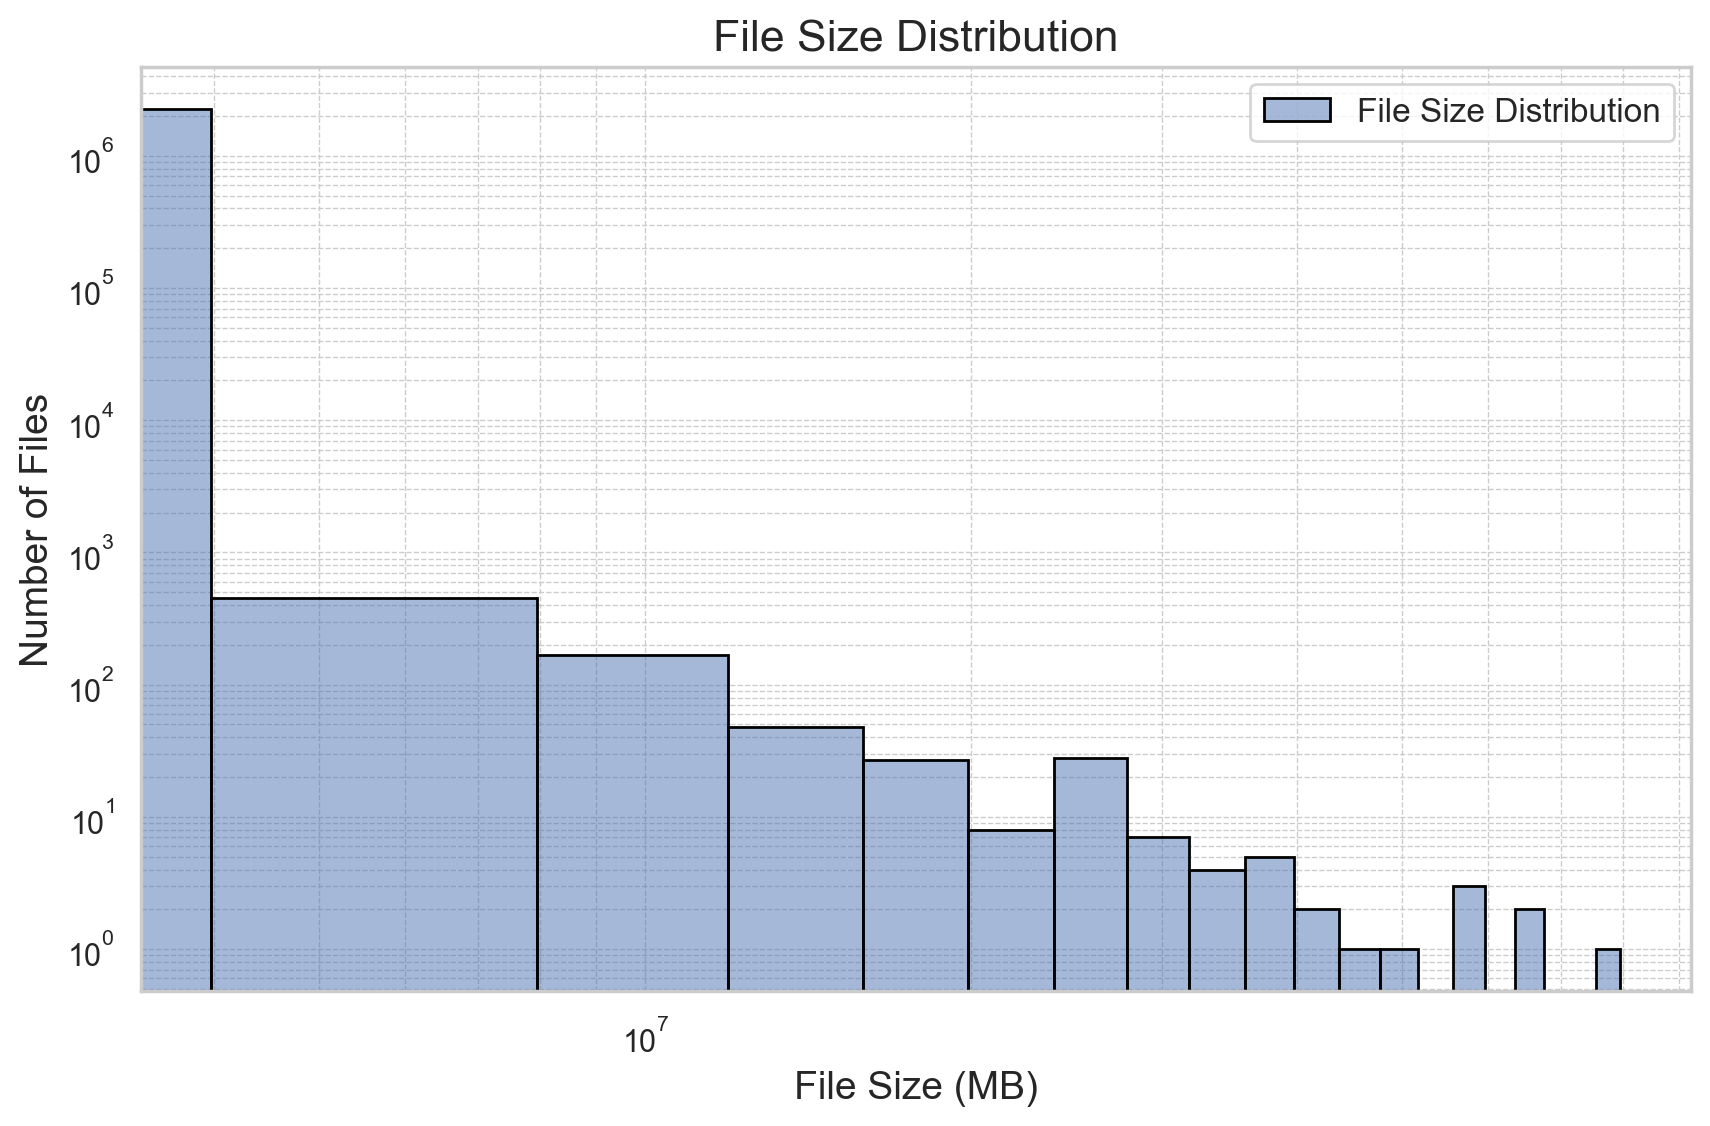

In [20]:
sns.set(style="whitegrid")

deep_palette = sns.color_palette("muted")

# Plot histogram using Seaborn with the first color from the 'deep' palette
plt.figure(figsize=(10, 6))
sns.histplot(df, bins=20, color=deep_palette[0], edgecolor='black')

# Set the title and labels
plt.title('File Size Distribution', fontsize=16)
plt.xlabel('File Size (MB)', fontsize=14)
plt.ylabel('Number of Files', fontsize=14)

plt.xscale('log')
plt.yscale('log')

# Add gridlines and legend
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(['File Size Distribution'], fontsize=12)

plt.show()


In [21]:
column_description = df['fileSize'].describe()

print(column_description)

count    2.258513e+06
mean     1.296818e+04
std      2.407529e+05
min      0.000000e+00
25%      3.390000e+02
50%      1.163000e+03
75%      3.839000e+03
max      7.950287e+07
Name: fileSize, dtype: float64


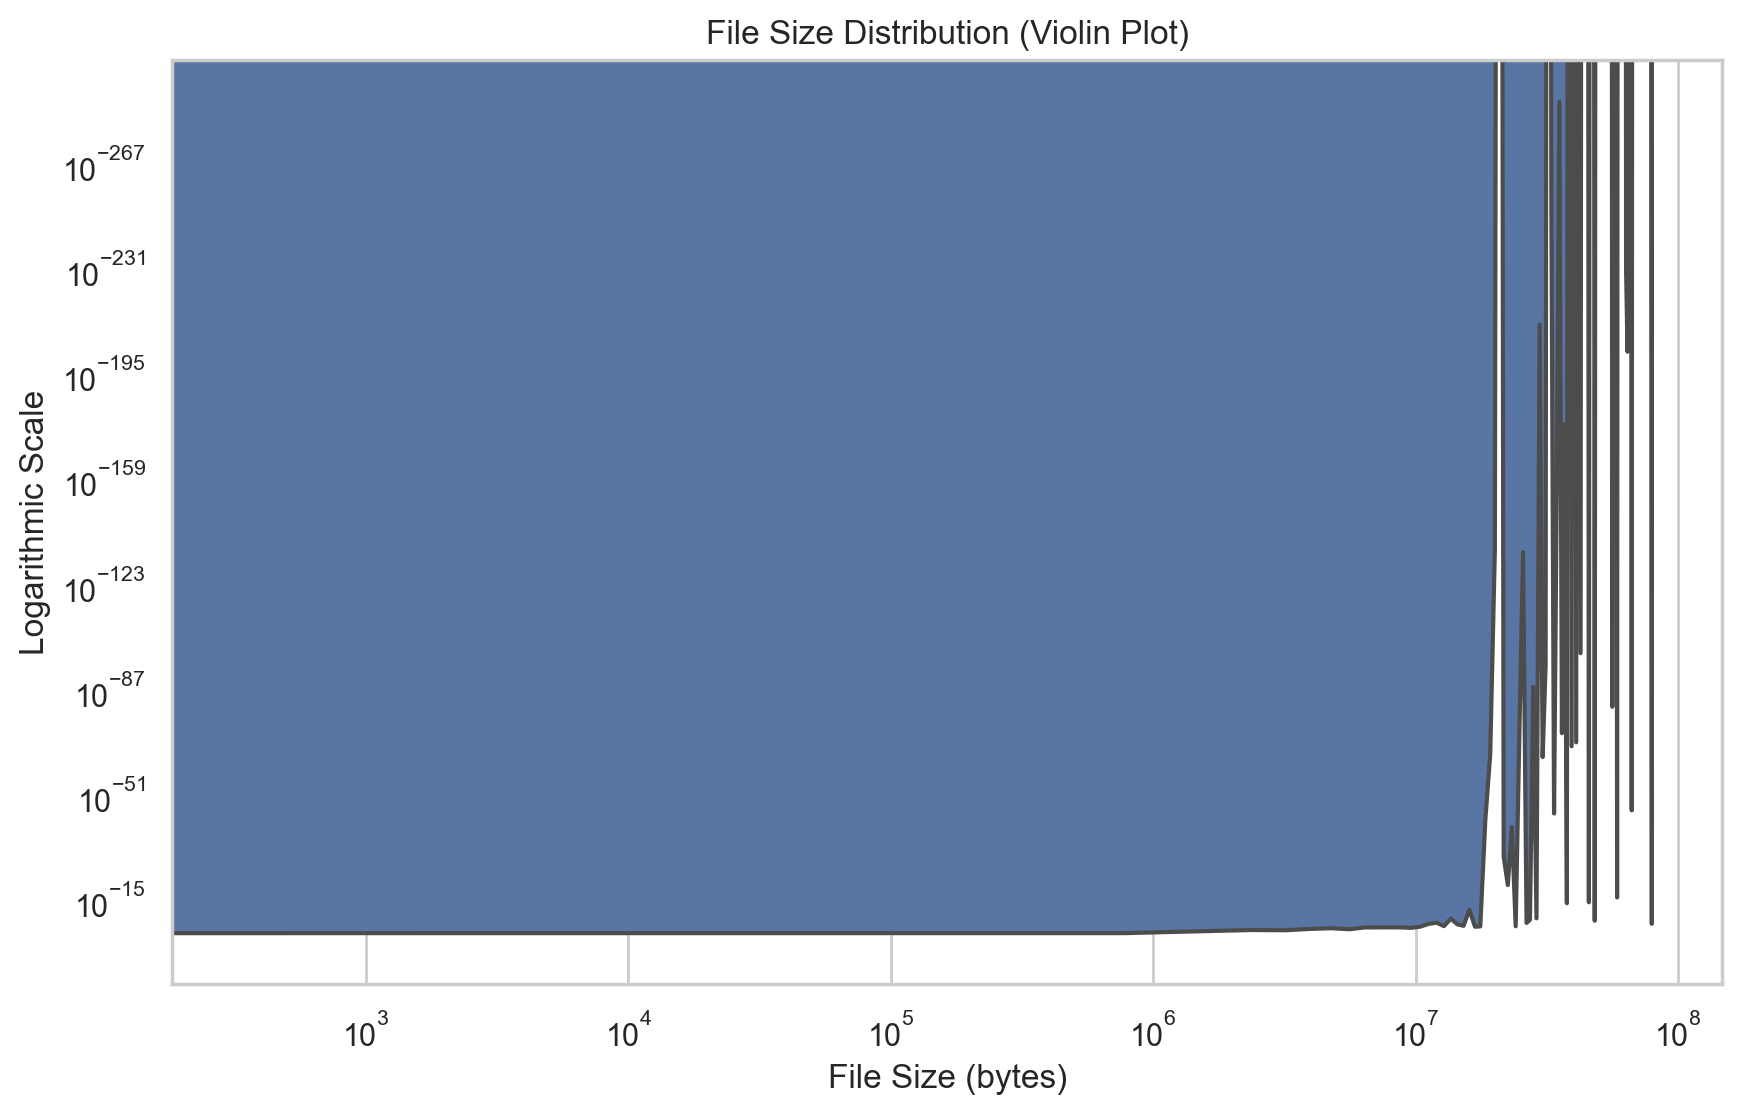

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='fileSize', data=df)
plt.title('File Size Distribution (Violin Plot)')
plt.xlabel('File Size (bytes)')
plt.ylabel('Logarithmic Scale')
plt.yscale('log')
plt.xscale('log')
plt.show()

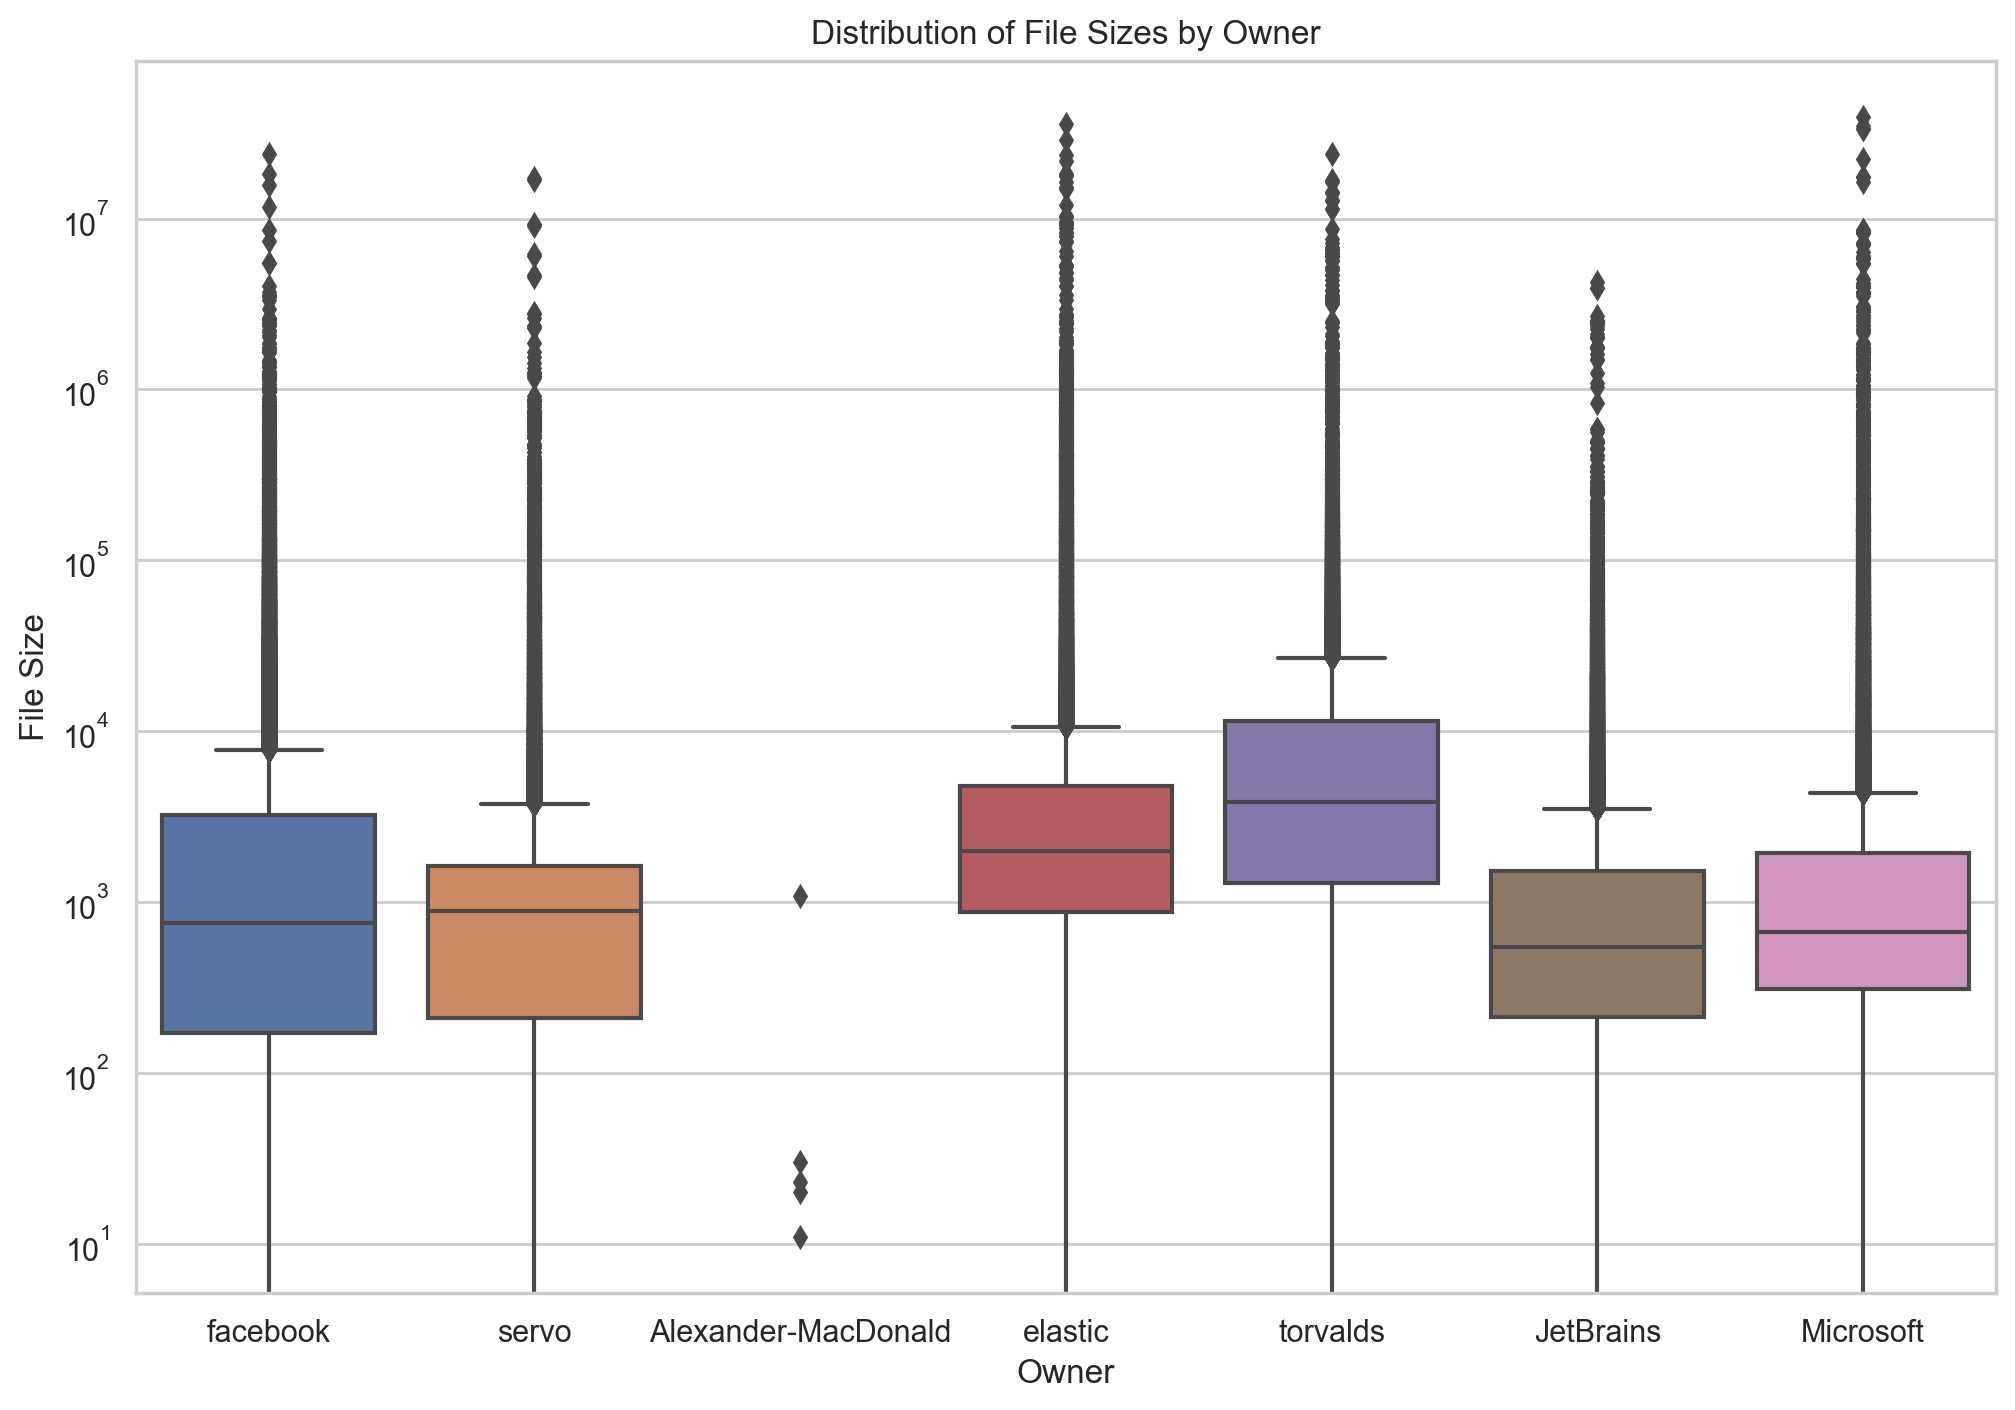

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

top_owners = df['owner'].value_counts().head(7).index
filtered_df = df[df['owner'].isin(top_owners)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='owner', y='fileSize', data=filtered_df, order=top_owners)
plt.title('Distribution of File Sizes by Owner')
plt.xlabel('Owner')
plt.ylabel('File Size')
plt.yscale('log')

plt.show()


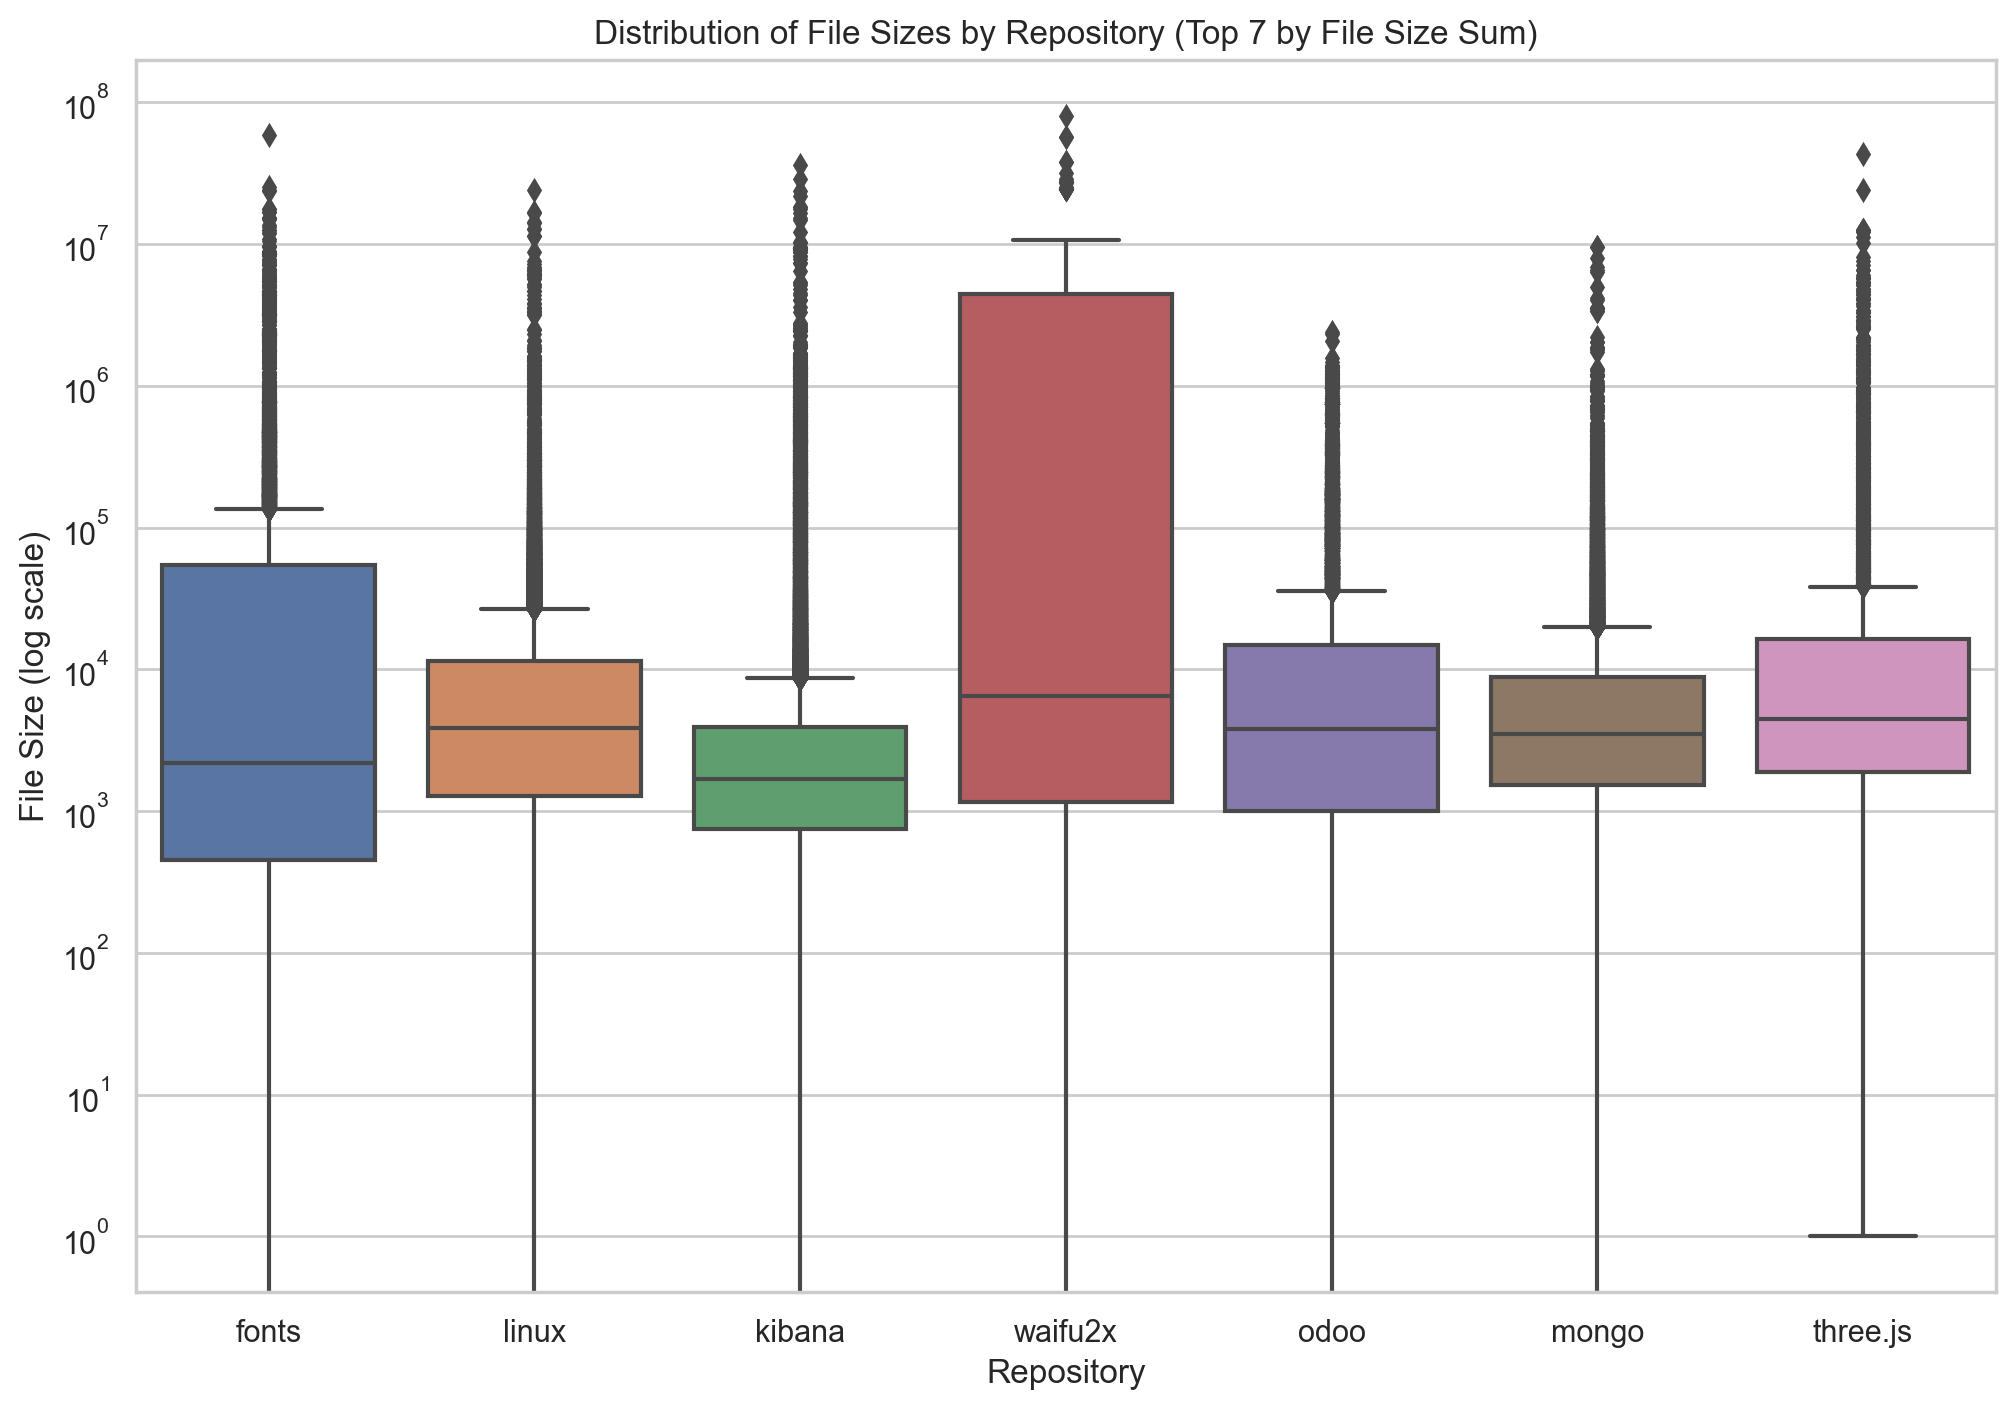

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the sum of file sizes for each repository
repo_file_size_sum = df.groupby('repo')['fileSize'].sum()

# Get the top 7 repositories by file size sum
top_repos = repo_file_size_sum.nlargest(7).index
filtered_df = df[df['repo'].isin(top_repos)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='repo', y='fileSize', data=filtered_df, order=top_repos)
plt.title('Distribution of File Sizes by Repository (Top 7 by File Size Sum)')
plt.xlabel('Repository')
plt.ylabel('File Size (log scale)')
plt.yscale('log')

plt.show()


In [25]:
top_owners

Index(['facebook', 'servo', 'Alexander-MacDonald', 'elastic', 'torvalds',
       'JetBrains', 'Microsoft'],
      dtype='object', name='owner')

In [29]:
df

,owner,repo,filePath,fileSize
0,0xAX,linux-insides,'main/.github/ISSUE_TEMPLATE/bug_report.md',565
1,0xAX,linux-insides,'main/.github/ISSUE_TEMPLATE/feature_request.md',638
2,0xAX,linux-insides,'main/.gitignore',12
3,0xAX,linux-insides,'main/Assets/linux-kernel.png',31671
4,0xAX,linux-insides,'main/Booting/README.md',1158
...,...,...,...,...
2258518,zxing,zxing,'main/zxingorg/src/test/java/com/google/zxing/...,1112
2258519,zxing,zxing,'main/zxingorg/src/test/java/com/google/zxing/...,1027
2258520,zxing,zxing,'main/zxingorg/src/test/java/com/google/zxing/...,1248
2258521,zxing,zxing,'main/zxingorg/src/test/java/com/google/zxing/...,1995


In [34]:
top_message = df['repo'].value_counts().head(10)
top_message

repo
servo              127066
test-repo          100005
hhvm                89616
linux               82439
kotlin              82251
DefinitelyTyped     73368
TypeScript          70224
kibana              70049
gitlabhq            52166
mongo               46364
Name: count, dtype: int64

In [33]:
import pandas as pd

# Group by 'owner' and 'repo' to see how many repositories each owner has
grouped = df.groupby('owner')['repo'].nunique()

# Convert the Series to a DataFrame for better readability
repos_per_owner = grouped.reset_index(name='num_repos')

# Sort the DataFrame based on 'num_repos' to see owners with the most repositories
sorted_repos_per_owner = repos_per_owner.sort_values(by='num_repos', ascending=False)

print(sorted_repos_per_owner)


                owner  num_repos
307          facebook         20
360            google         19
159           angular          7
138            airbnb          5
696      sindresorhus          5
..                ...        ...
280           domnikl          1
283  douglascrockford          1
284             drduh          1
285           dropbox          1
798             zxing          1

[799 rows x 2 columns]


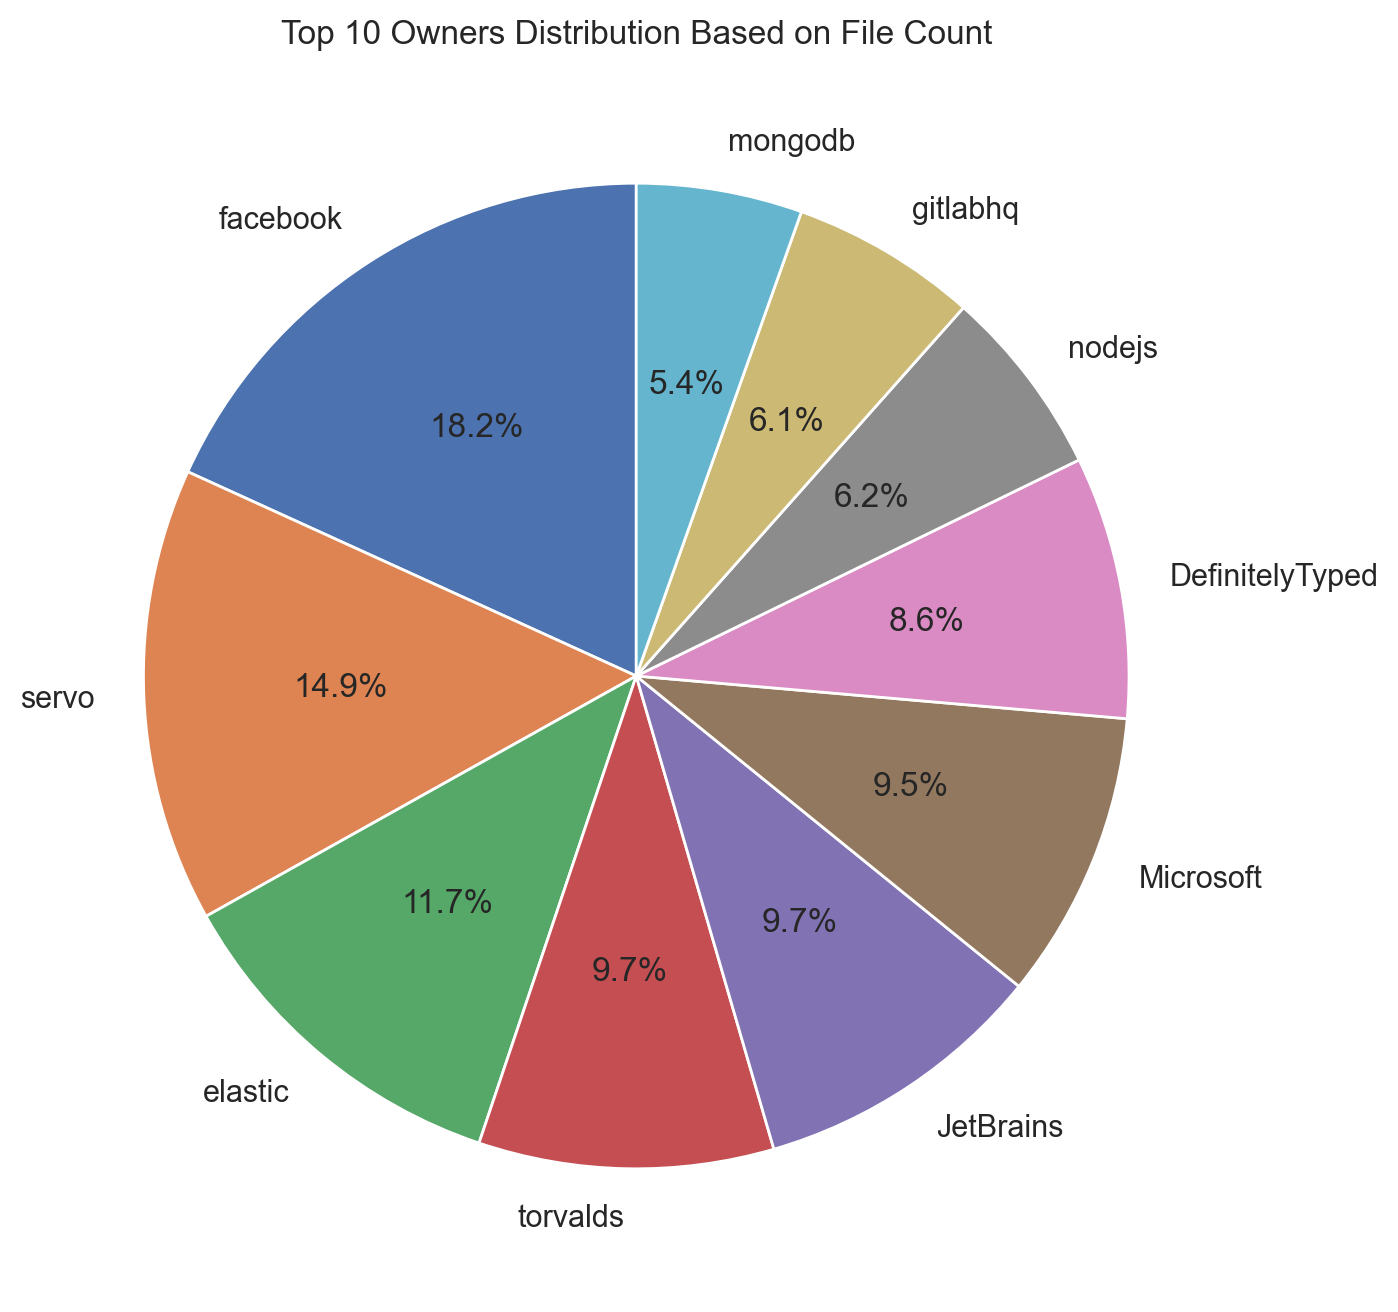

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out the repository named "test" before counting
filtered_df = df[df['owner'] != 'Alexander-MacDonald']
top_owners = filtered_df['owner'].value_counts().nlargest(10)

# Create a pie chart using matplotlib for the top 10 owners, excluding "test"
plt.figure(figsize=(8, 8))
plt.pie(top_owners, labels=top_owners.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Owners Distribution Based on File Count')
plt.show()


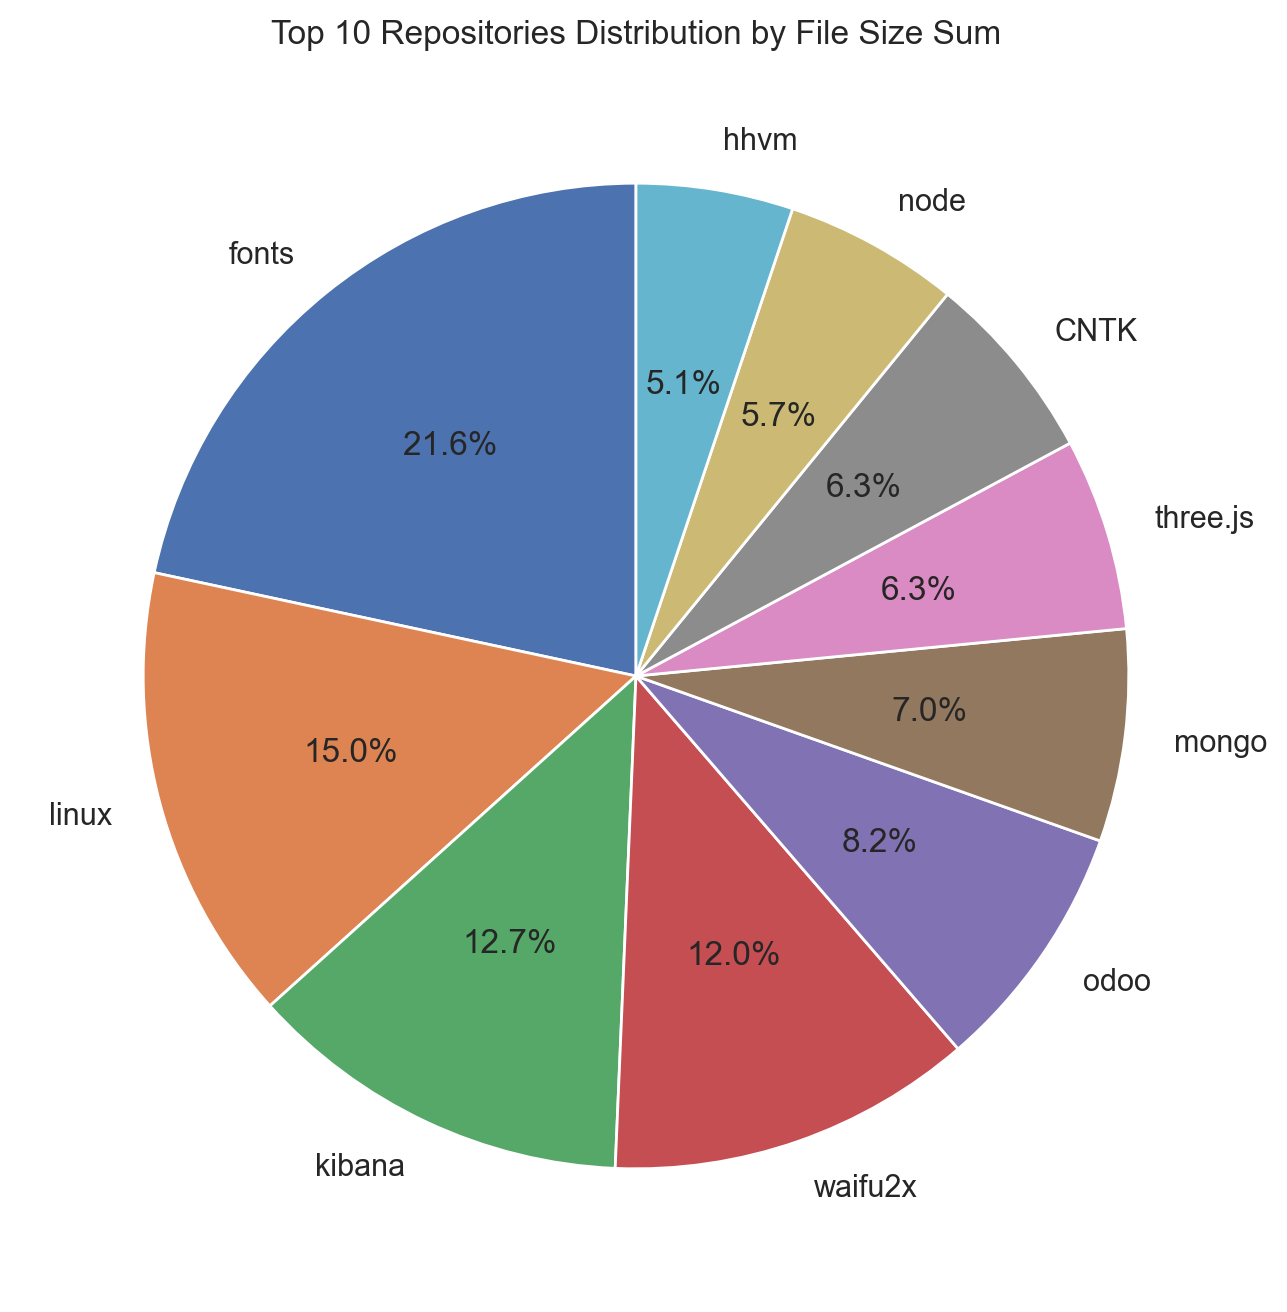

In [47]:
import matplotlib.pyplot as plt

# Calculate the sum of file sizes for each repository
repo_file_size_sum = df.groupby('repo')['fileSize'].sum()

# Get the top 10 repositories by file size sum
top_repos = repo_file_size_sum.nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_repos, labels=top_repos.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Repositories Distribution by File Size Sum')
plt.show()


In [48]:
# Categorize files
def categorize_file(file_path):
    if '/tests/' in file_path:
        return 'Test'
    elif '/docs/' in file_path or '/documentation/' in file_path:
        return 'Documentation'
    elif '/.github/' in file_path:
        return 'GitHub Configuration'
    else:
        return 'Code'

# Apply categorization
df['fileCategory'] = df['filePath'].apply(categorize_file)

# Calculate the ratio of code to documentation
code_count = df[df['fileCategory'] == 'Code'].shape[0]
documentation_count = df[df['fileCategory'] == 'Documentation'].shape[0]

ratio_code_to_documentation = code_count / documentation_count if documentation_count != 0 else 0

print(f"Number of code files: {code_count}")
print(f"Number of documentation files: {documentation_count}")
print(f"Ratio of code to documentation: {ratio_code_to_documentation:.2f}")

Number of code files: 1819331
Number of documentation files: 64272
Ratio of code to documentation: 28.31


In [ ]:
import os
import pandas as pd

# Function to extract the file extension and clean it
def get_file_extension(file_path):
    # Extract the extension
    extension = os.path.splitext(file_path)[1]
    # Remove the leading dot and any single quotes
    cleaned_extension = extension.replace('.', '').replace("'", "")
    return cleaned_extension

# Apply the function to the 'filePath' column to get clean extensions without leading dot and quotes
df['fileType'] = df['filePath'].apply(get_file_extension)

# Now df['fileType'] has the extensions of the files, you can count each type
file_type_counts = df['fileType'].value_counts()



# Convert the file_type_counts to a string with each line containing the extension and count
file_types_str = '\n'.join([f"{ext}: {count}" for ext, count in file_type_counts.items()])

# Define the path for the output text file
output_file_path = 'file_types_counts.txt'  # Change this to your preferred path

# Write the string to a text file
with open(output_file_path, 'w') as file:
    file.write(file_types_str)


In [ ]:
df.head()

,owner,repo,filePath,fileSize,fileSize_MB,fileCategory,fileType
0,0xAX,linux-insides,'main/.github/ISSUE_TEMPLATE/bug_report.md',565,0.000565,Code,md
1,0xAX,linux-insides,'main/.github/ISSUE_TEMPLATE/feature_request.md',638,0.000638,Code,md
2,0xAX,linux-insides,'main/.gitignore',12,0.000012,Other,
3,0xAX,linux-insides,'main/Assets/linux-kernel.png',31671,0.031671,Documentation,png
4,0xAX,linux-insides,'main/Booting/README.md',1158,0.001158,Code,md


In [ ]:
# Define the categorization function based on fileType
def categorize_file_by_type(file_type, code_exts, doc_exts):
    # Directly categorize based on the fileType
    if file_type in code_exts:
        return 'Code'
    elif file_type in doc_exts:
        return 'Documentation'
    else:
        return 'Other'

# Define the sets of file extensions
code_extensions = {
    'js', 'java', 'c', 'cpp', 'cs', 'py', 'go', 'rb', 'php', 'ts', 'swift', 'kt', 'rs',
    'h', 'hpp', 'cxx', 'cc', 'm', 'scala', 'sh', 'bash', 'sql', 'pl', 'pm', 't', 'tsx',
    'jsx', 'lua', 'groovy', 'gd', 'tcl', 'vbs', 's', 'r', 'd', 'mdx', 'swift', 'kts',
    'ino', 'cls', 'pas', 'asm', 's', 'v', 'vhdl', 'sv', 'svh', 'f', 'f90', 'f95', 'for',
    'ftn', 'sas', 'jl', 'mat', 'mex', 'mexn', 'mexrs6', 'mn', 'mum', 'nb', 'nbp', 'p', 
    'mlx', 'r2015bc', 'r2015a', 'r2015b', 'r2016a', 'r2016b', 'r2017a', 'r2017b', 'r2018a',
    'r2018b', 'r2019a', 'r2019b', 'r2020a', 'r2020b', 'r2021a', 'r2021b', 'xmcd', 'xvc', 
    'mlapp', 'plsql', 'yaml', 'yml', 'json', 'xml', 'gradle', 'html', 'css', 'scss', 'less', 'md',
    'sass', 'ejs', 'jsp', 'dart', 'swiftui', 'toml', 'ini', 'cfg', 'conf',
    'ps1', 'bat', 'zsh', 'fish', 'ipynb', 'rmd', 'gradle', 'xml', 'yaml', 'json', 'o', 'obj', 'a', 'lib', 'so', 'dll', 'dylib', 'awk', 'sed', 'tf', 'dockerfile', 'db', 'sqlite', 'mdb', 'tf', 'hcl', 'dockerfile', 'compose', 'vue', 'jsx', 'tsx',
    'erb', 'pug', 'twig', 'unity', 'unoproj', 'godot', 'data', 'model', 'keras'
    'sol', 'wasm', 'wasm', 'asp', 'php5', 'php7', 'phtml', 'awk', 'perl', 'pyc', 'rbw',
    'o', 'a', 'lib', 'dll', 'so', 'dylib', 'k8s', 'helm', 'chart', 'vagrant',
    'ansible', 'puppet', 'chef', 'csv', 'parquet', 'orc', 'avro', 'pickle',
    'npz', 'npy', 'git', 'gitignore', 'gitconfig', 'gitattributes', 'svn',
    'npm', 'yarn', 'makefile', 'cmake', 'gradlew', 'pom.xml', 'gemspec', 'nuspec',
    'spec', 'test', 'tests', 'testing', 'benchmark', 'less', 'sass', 'styl', 'awk', 'sed', 'ksh', 'env', 'properties', 'tfstate', 'tfvars',
    'gitlab-ci.yml', 'travis.yml', 'npmrc', 'yarnrc', 'gemspec', 'makefile', 'cmake', 'gradlew',
    'lua', 'perl', 'prl', 'r', 'rscript', 'vba', 'vb', 'pas', 'erl', 'ex', 'exs', 'scala', 'groovy'
}

doc_extensions = {
    'png','md', 'txt', 'rst', 'doc', 'docx', 'pdf', 'odt', 'rtf', 'tex', 'latex', 'ltx', 'wpd', 'epub', 'chm', 'markdown',
    'svg', 'gif', 'jpeg', 'jpg','asciidoc', 'dita', 'docm', 'bmp', 'tiff', 'mp4', 'avi', 'mov', 'ppt', 'pptx', 'uml', 'dia', 
    'drawio', 'asciidoc', 'nroff', 'epub', 'mobi', 'ibooks', 'psd', 'ai', 'indd', 'sketch', 'xd',
    'mp4', 'avi', 'mov', 'flv', 'mkv', 'mp3', 'wav', 'aac', 'ogg', 'flac',
    'xls', 'xlsx', 'ods', 'ppt', 'pptx', 'odp', 'vsdx', 'bpmn', 'mobi', 'epub', 'ibooks', 'dita', 'ditamap', 'wikitext', 'ai', 'psd', 'indd', 'sketch', 'fig',
    'stl', 'obj', 'dwg', 'dxf'
}



# Apply the categorization to the DataFrame based on the fileType column
df['fileCategory'] = df['fileType'].apply(lambda x: categorize_file_by_type(x, code_extensions, doc_extensions))


In [ ]:
# Get the counts of each file category
category_counts = df['fileCategory'].value_counts()

# Extract the counts for code and documentation
code_count = category_counts.get('Code', 0)
documentation_count = category_counts.get('Documentation', 0)

# Calculate the ratio of code to documentation
ratio_code_to_documentation = code_count / documentation_count if documentation_count != 0 else 0

print(f"Number of code files: {code_count}")
print(f"Number of documentation files: {documentation_count}")
print(f"Ratio of code to documentation: {ratio_code_to_documentation:.2f}")


Number of code files: 1563686
Number of documentation files: 317606
Ratio of code to documentation: 4.92


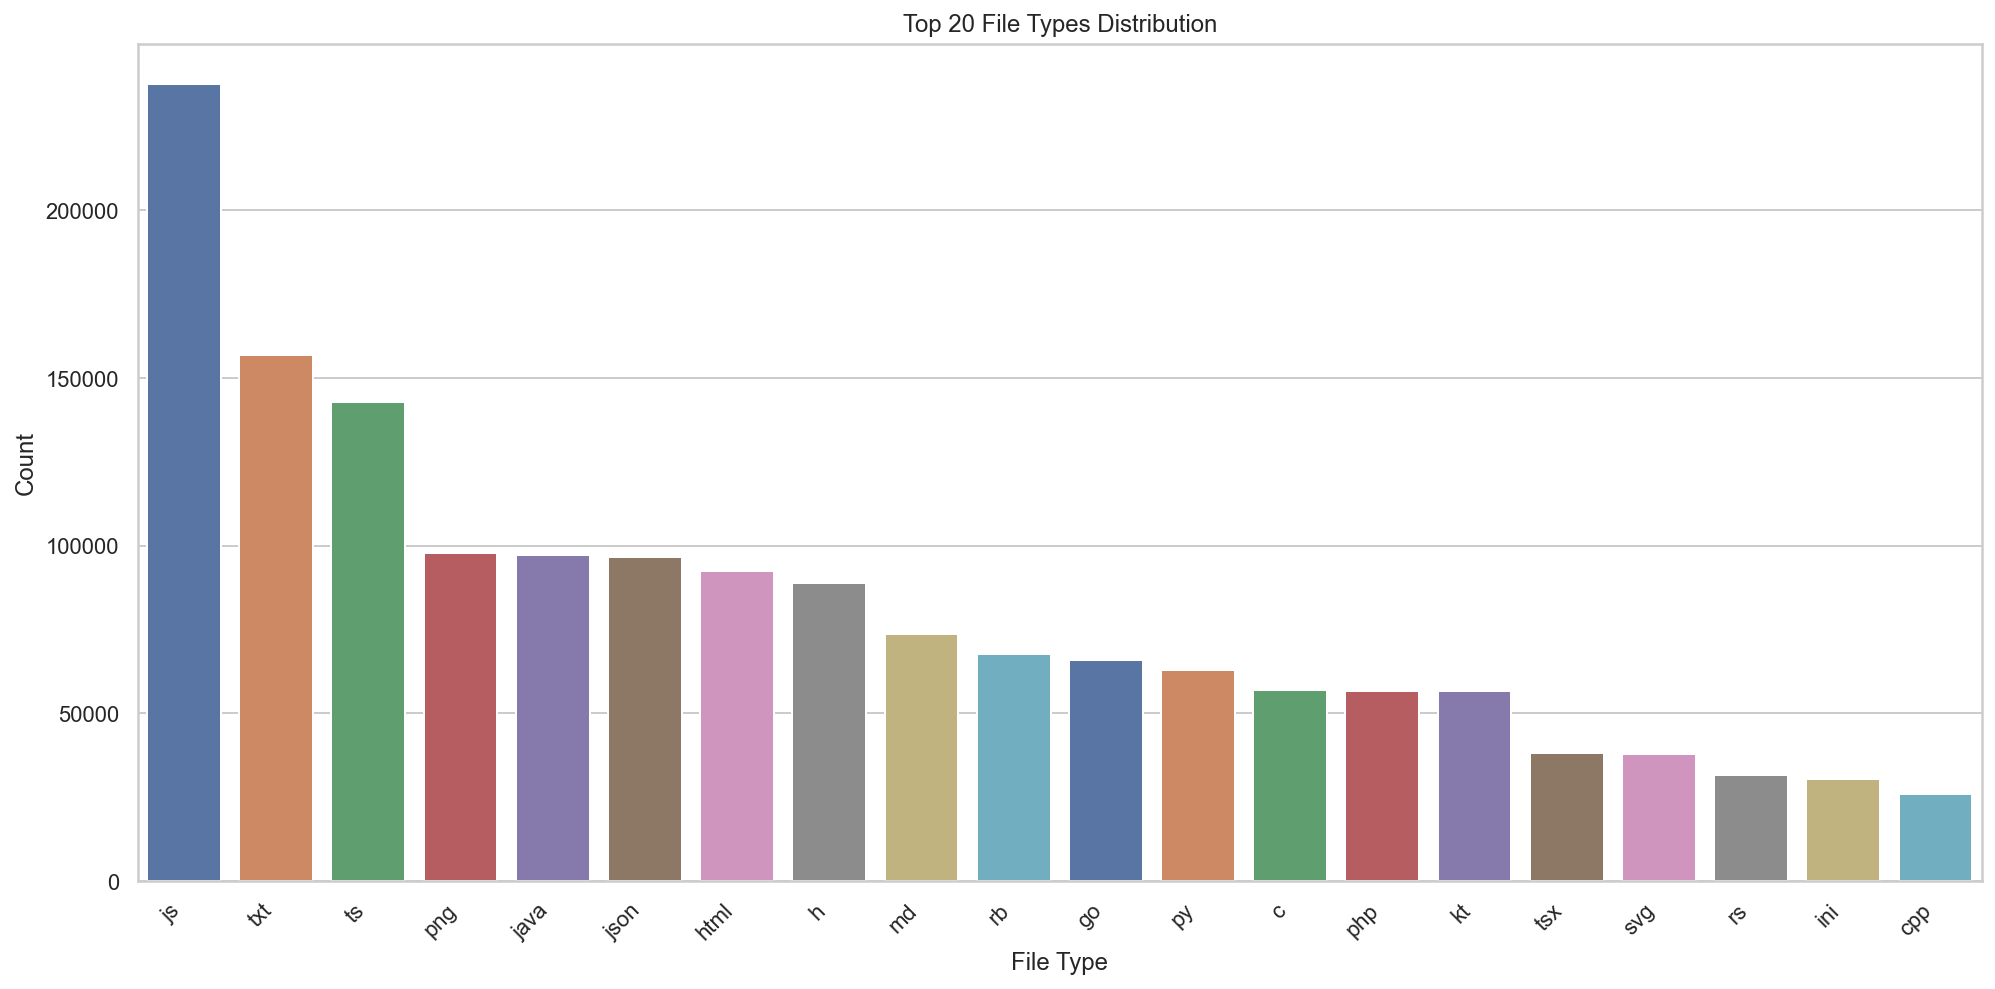

In [ ]:
import seaborn as sns
import pandas as pd

# We will read the content into a DataFrame, assuming the structure is similar to what was provided
file_types_df = pd.read_csv('file_types_counts.txt', sep=':', names=['fileType', 'count'])

# Clean up the file types by removing unwanted characters and sorting
file_types_df['fileType'] = file_types_df['fileType'].str.strip().str.replace("'", "").str.replace('"', '')
file_types_df = file_types_df.dropna()
file_types_df = file_types_df[file_types_df['fileType'] != '']  # Remove any empty file types if present
file_types_df = file_types_df.sort_values(by='count', ascending=False)  # Sort the data for better visualization

top_file_types_df = file_types_df.head(20)

plt.figure(figsize=(14, 7))
sns.barplot(data=top_file_types_df, x='fileType', y='count', palette='deep')

plt.title('Top 20 File Types Distribution')
plt.xlabel('File Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


##### idenitfy the "other' files

In [ ]:
# Define the categorization function based on file path
def categorize_file(file_path):
    if '/tests/' in file_path:
        return 'Test'
    elif '/docs/' in file_path or '/documentation/' in file_path:
        return 'Documentation'
    elif '/.github/' in file_path:
        return 'GitHub Configuration'
    else:
        return 'Code'

# Apply the categorization function only to rows with 'Other' in fileCategory
df.loc[df['fileCategory'] == 'Other', 'fileCategory'] = df[df['fileCategory'] == 'Other']['filePath'].apply(categorize_file)

# Recalculate the counts for code and documentation categories
code_count = df[df['fileCategory'] == 'Code'].shape[0]
documentation_count = df[df['fileCategory'] == 'Documentation'].shape[0]

ratio_code_to_documentation = code_count / documentation_count if documentation_count != 0 else 0

print(f"Number of code files: {code_count}")
print(f"Number of documentation files: {documentation_count}")
print(f"Ratio of code to documentation: {ratio_code_to_documentation:.2f}")


Number of code files: 1822966
Number of documentation files: 322289
Ratio of code to documentation: 5.66


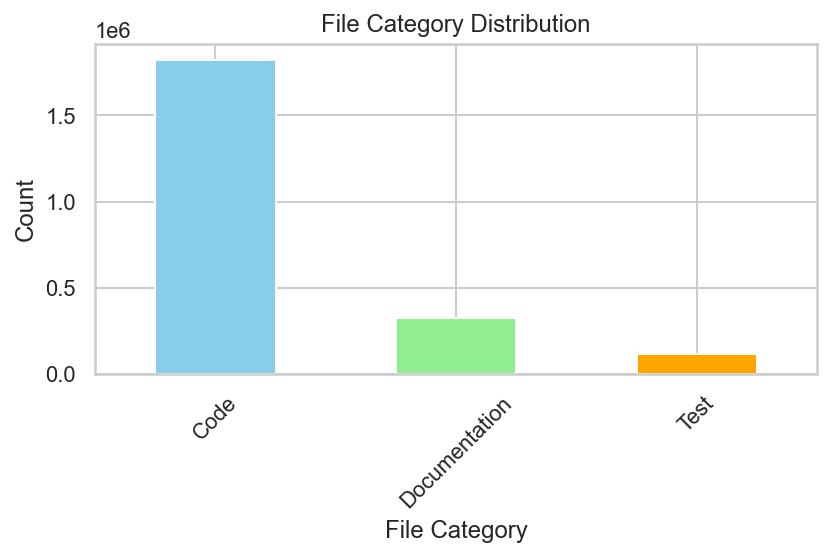

In [ ]:
# Let's plot the filtered categories again with different colors for each bar
filtered_category_counts = category_counts[category_counts.index != 'GitHub Configuration']
# Assigning a unique color to each category
colors = ['skyblue', 'lightgreen', 'orange']  # We have three colors for three categories

# If there are more categories, we can generate more colors or use a colormap
if len(filtered_category_counts) > len(colors):
    cmap = plt.get_cmap('tab10')  # A colormap with 10 distinct colors
    colors = [cmap(i) for i in range(len(filtered_category_counts))]

filtered_category_counts.plot(kind='bar', color=colors)
plt.title('File Category Distribution')
plt.xlabel('File Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


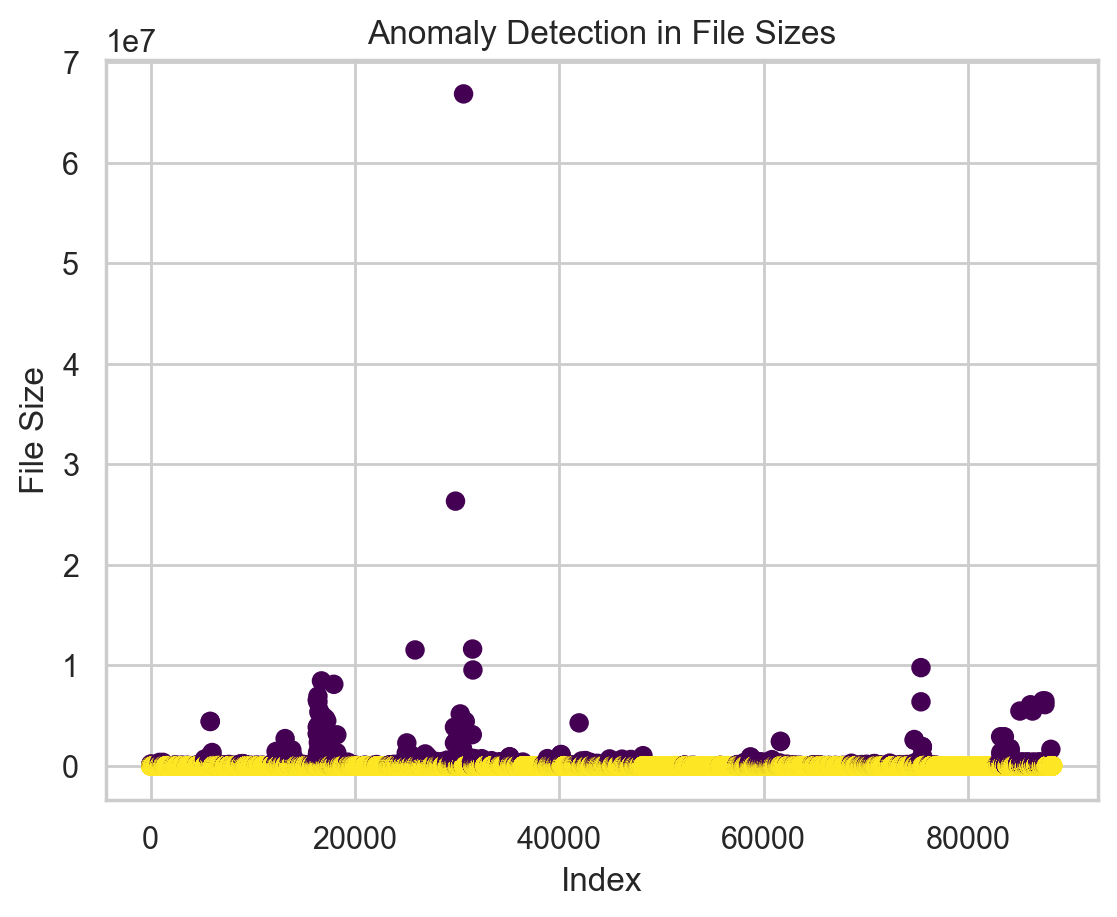

Rows with anomalies:
         owner    repo  \
3      alibaba   druid   
20     alibaba   druid   
21     alibaba   druid   
22     alibaba   druid   
23     alibaba   druid   
...        ...     ...   
87706    atech  postal   
87713    atech  postal   
88105    atech  postal   
88106    atech  postal   
88109    atech  postal   

                                                                      filePath  \
3                                        'main/.mvn/wrapper/maven-wrapper.jar'   
20              'main/core/src/main/java/com/alibaba/druid/filter/Filter.java'   
21       'main/core/src/main/java/com/alibaba/druid/filter/FilterAdapter.java'   
22         'main/core/src/main/java/com/alibaba/druid/filter/FilterChain.java'   
23     'main/core/src/main/java/com/alibaba/druid/filter/FilterChainImpl.java'   
...                                                                        ...   
87706                                 'main/app/assets/images/spinner-sub.gif'   
87713     

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


# Extract the 'fileSize' column for anomaly detection
file_sizes = df['fileSize'].values.reshape(-1, 1)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
model.fit(file_sizes)

 
df['anomaly'] = model.predict(file_sizes)

 
plt.scatter(df.index, df['fileSize'], c=df['anomaly'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('File Size')
plt.title('Anomaly Detection in File Sizes')
plt.show()

anomalies = df[df['anomaly'] == -1]
print("Rows with anomalies:")
print(anomalies)
